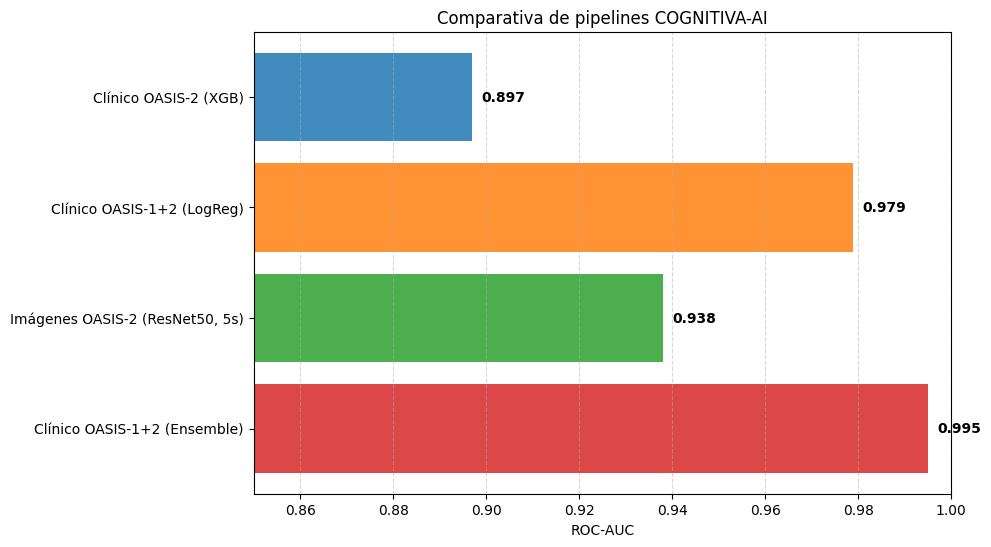

In [1]:
import matplotlib.pyplot as plt

labels = ["Clínico OASIS-2 (XGB)", 
          "Clínico OASIS-1+2 (LogReg)", 
          "Imágenes OASIS-2 (ResNet50, 5s)", 
          "Clínico OASIS-1+2 (Ensemble)"]

aucs = [0.897, 0.979, 0.938, 0.995]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

plt.figure(figsize=(9,6))
bars = plt.barh(labels, aucs, color=colors, alpha=0.85)
plt.xlabel("ROC-AUC")
plt.title("Comparativa de pipelines COGNITIVA-AI")
plt.xlim(0.85,1.0)

# Anotar valores
for bar, auc in zip(bars, aucs):
    plt.text(bar.get_width()+0.002, bar.get_y()+bar.get_height()/2, f"{auc:.3f}",
             va='center', fontsize=10, fontweight="bold")

plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


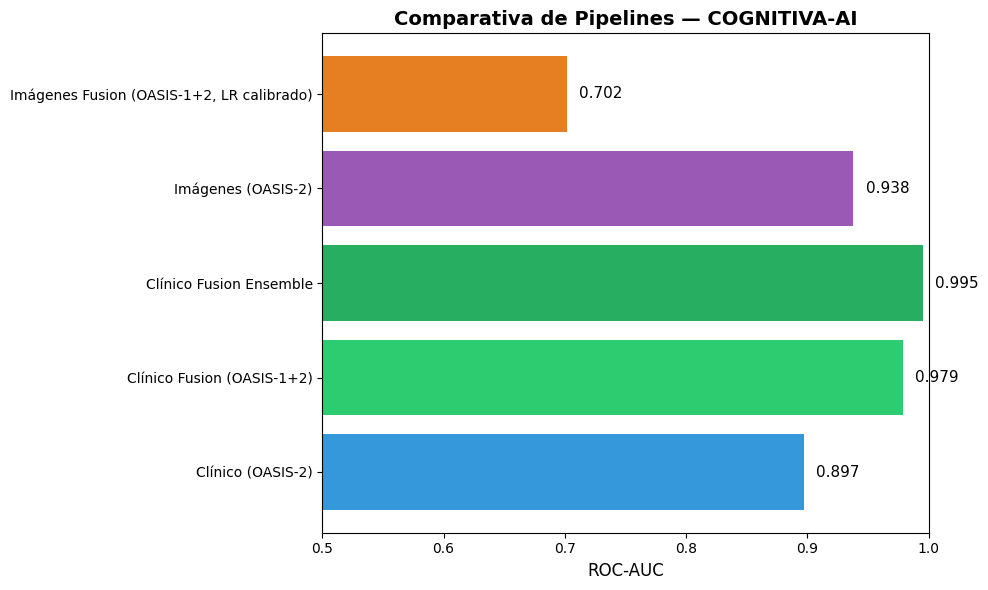

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Crear directorio de salida si no existe
os.makedirs("graficos", exist_ok=True)

# Datos actualizados
pipelines = [
    "Clínico (OASIS-2)",
    "Clínico Fusion (OASIS-1+2)",
    "Clínico Fusion Ensemble",
    "Imágenes (OASIS-2)",
    "Imágenes Fusion (OASIS-1+2, LR calibrado)"
]

auc_scores = [
    0.897,   # XGBoost OASIS-2
    0.979,   # LogReg OASIS-1+2
    0.995,   # Ensemble OASIS-1+2
    0.938,   # ResNet50 (5 slices OASIS-2)
    0.702    # Mejor test AUC a nivel paciente (OAS1 embeddings + LR calibrado)
]

colors = [
    "#3498db",  # azul
    "#2ecc71",  # verde
    "#27ae60",  # verde oscuro
    "#9b59b6",  # violeta
    "#e67e22"   # naranja
]

plt.figure(figsize=(10,6))
bars = plt.barh(pipelines, auc_scores, color=colors)
plt.xlabel("ROC-AUC", fontsize=12)
plt.title("Comparativa de Pipelines — COGNITIVA-AI", fontsize=14, weight="bold")
plt.xlim(0.5, 1.0)

# Etiquetas con valores
for bar, score in zip(bars, auc_scores):
    plt.text(score+0.01, bar.get_y() + bar.get_height()/2,
             f"{score:.3f}", va="center", fontsize=11)

plt.tight_layout()
plt.savefig("graficos/comparativa.png", dpi=150)
plt.show()


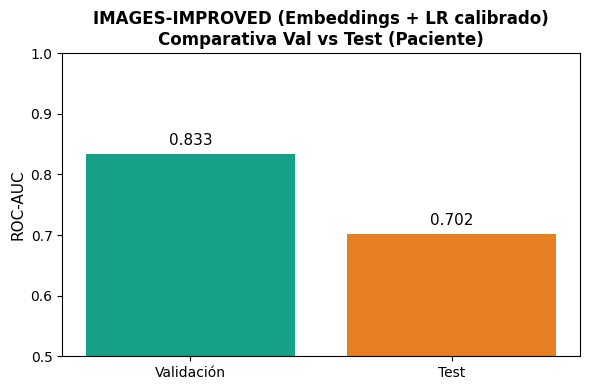

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("graficos", exist_ok=True)

# Métricas paciente-nivel (IMAGES-IMPROVED con embeddings + LR calibrado)
auc_val  = 0.833
auc_test = 0.702

labels = ["Validación", "Test"]
values = [auc_val, auc_test]
colors = ["#16a085", "#e67e22"]  # verde azulado y naranja (coherentes con la paleta anterior)

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)
plt.ylim(0.5, 1.0)
plt.ylabel("ROC-AUC", fontsize=11)
plt.title("IMAGES-IMPROVED (Embeddings + LR calibrado)\nComparativa Val vs Test (Paciente)", fontsize=12, weight="bold")

for bar, score in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.01, f"{score:.3f}",
             ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.savefig("graficos/comparativa_images_improved_val_test_auc.png", dpi=150)
plt.show()


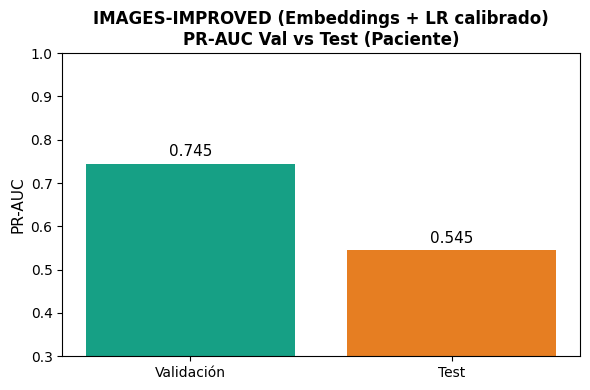

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("graficos", exist_ok=True)

# PR-AUC paciente-nivel
prauc_val  = 0.745
prauc_test = 0.545

labels = ["Validación", "Test"]
values = [prauc_val, prauc_test]
colors = ["#16a085", "#e67e22"]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)
plt.ylim(0.3, 1.0)
plt.ylabel("PR-AUC", fontsize=11)
plt.title("IMAGES-IMPROVED (Embeddings + LR calibrado)\nPR-AUC Val vs Test (Paciente)", fontsize=12, weight="bold")

for bar, score in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.01, f"{score:.3f}",
             ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.savefig("graficos/comparativa_images_improved_val_test_prauc.png", dpi=150)
plt.show()


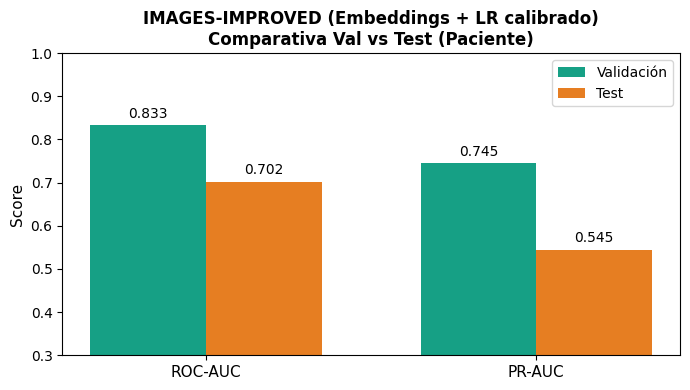

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("graficos", exist_ok=True)

# Métricas paciente-nivel (IMAGES-IMPROVED, embeddings + LR calibrado)
auc_val,  auc_test  = 0.833, 0.702
prauc_val, prauc_test = 0.745, 0.545

metrics = ["ROC-AUC", "PR-AUC"]
val_scores  = [auc_val,  prauc_val]
test_scores = [auc_test, prauc_test]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7, 4))
bars1 = plt.bar(x - width/2, val_scores,  width, label="Validación", color="#16a085")
bars2 = plt.bar(x + width/2, test_scores, width, label="Test",       color="#e67e22")

plt.xticks(x, metrics, fontsize=11)
plt.ylabel("Score", fontsize=11)
plt.ylim(0.3, 1.0)
plt.title("IMAGES-IMPROVED (Embeddings + LR calibrado)\nComparativa Val vs Test (Paciente)", fontsize=12, weight="bold")
plt.legend()

for bars in (bars1, bars2):
    for b in bars:
        h = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, h + 0.01, f"{h:.3f}",
                 ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig("graficos/comparativa_images_improved_auc_prauc.png", dpi=150)
plt.show()


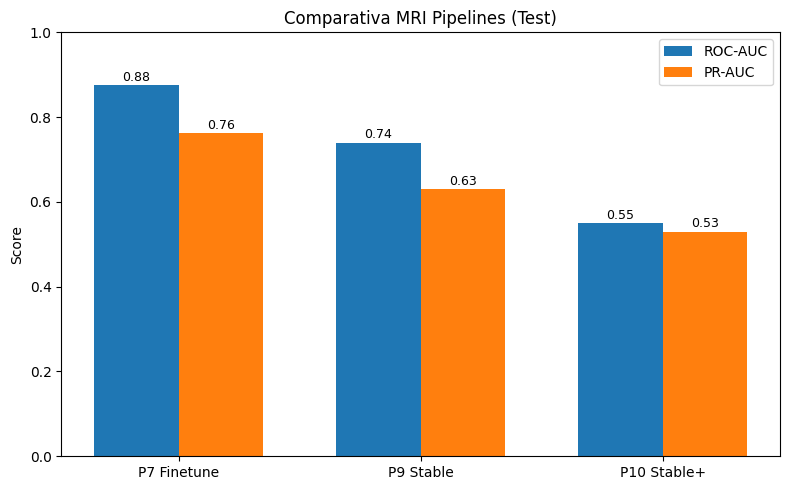

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos resumidos
pipelines = ["P7 Finetune", "P9 Stable", "P10 Stable+"]
auc_vals  = [0.876, 0.740, 0.55]   # AUC test
prauc_vals= [0.762, 0.630, 0.53]   # PR-AUC test

x = np.arange(len(pipelines))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bar1 = ax.bar(x - width/2, auc_vals, width, label='ROC-AUC')
bar2 = ax.bar(x + width/2, prauc_vals, width, label='PR-AUC')

# etiquetas encima de las barras
for bars in [bar1, bar2]:
    for b in bars:
        h = b.get_height()
        ax.annotate(f"{h:.2f}", xy=(b.get_x()+b.get_width()/2, h),
                    xytext=(0,3), textcoords="offset points",
                    ha="center", fontsize=9)

ax.set_ylabel("Score")
ax.set_title("Comparativa MRI Pipelines (Test)")
ax.set_xticks(x)
ax.set_xticklabels(pipelines)
ax.legend()
ax.set_ylim(0,1.0)

plt.tight_layout()
plt.show()


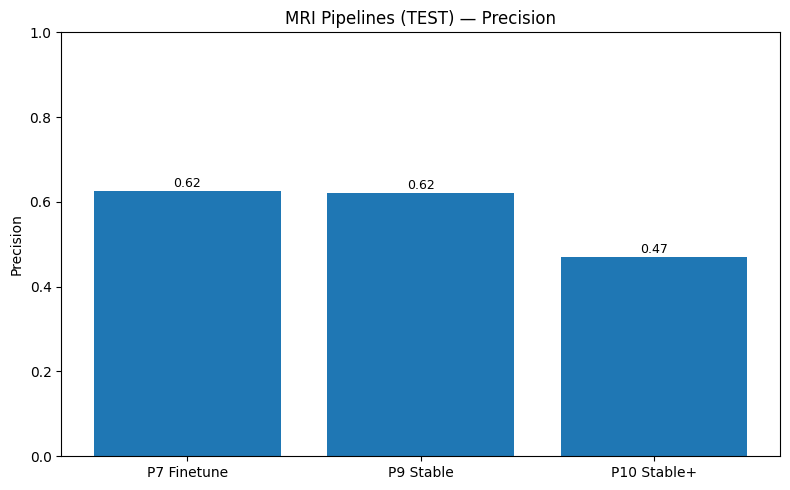

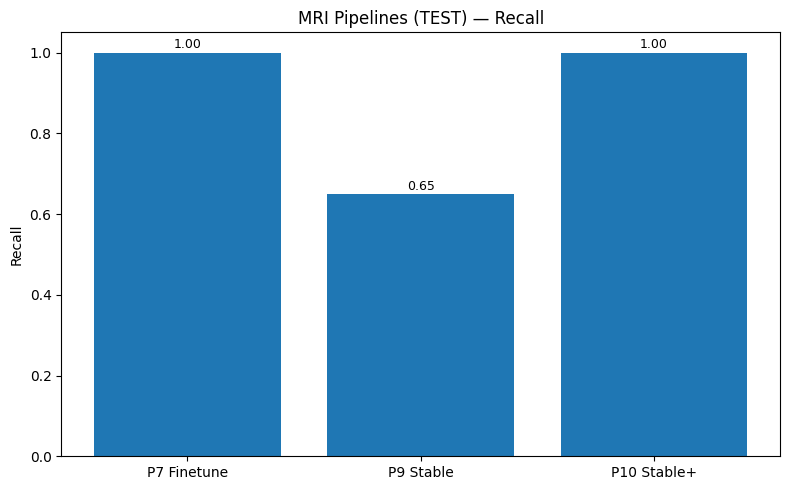

📈 Guardados en: graphs_from_metrics\mri_pipelines_precision_test.png
📈 Guardados en: graphs_from_metrics\mri_pipelines_recall_test.png


: 

In [ ]:
# === Comparativa Precisión y Recall (TEST) para P7 / P9 / P10 ===
# Valores usados (según tus resultados):
# P7 (finetune B3):     Precision=0.625, Recall=1.00
# P9 (stable):          Precision=0.62,  Recall=0.65
# P10 (stable plus):    Precision=0.47,  Recall=1.00
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

pipelines = ["P7 Finetune", "P9 Stable", "P10 Stable+"]
precision_vals = [0.625, 0.62, 0.47]
recall_vals    = [1.00, 0.65, 1.00]

x = np.arange(len(pipelines))
width = 0.35

# Dónde guardar (ajusta si ya tienes OUT_DIR definido)
try:
    SAVE_DIR = Path(OUT_DIR) / "graphs_from_metrics"
except NameError:
    SAVE_DIR = Path("./graphs_from_metrics")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

# --- Gráfico de Precisión ---
fig1, ax1 = plt.subplots(figsize=(8,5))
bars_p = ax1.bar(x, precision_vals)
for b in bars_p:
    h = b.get_height()
    ax1.annotate(f"{h:.2f}", xy=(b.get_x()+b.get_width()/2, h),
                 xytext=(0,3), textcoords="offset points",
                 ha="center", fontsize=9)
ax1.set_ylabel("Precision")
ax1.set_title("MRI Pipelines (TEST) — Precision")
ax1.set_xticks(x)
ax1.set_xticklabels(pipelines)
ax1.set_ylim(0, 1.0)
plt.tight_layout()
prec_path = SAVE_DIR / "mri_pipelines_precision_test.png"
plt.savefig(prec_path, dpi=150)
plt.show()

# --- Gráfico de Recall ---
fig2, ax2 = plt.subplots(figsize=(8,5))
bars_r = ax2.bar(x, recall_vals)
for b in bars_r:
    h = b.get_height()
    ax2.annotate(f"{h:.2f}", xy=(b.get_x()+b.get_width()/2, h),
                 xytext=(0,3), textcoords="offset points",
                 ha="center", fontsize=9)
ax2.set_ylabel("Recall")
ax2.set_title("MRI Pipelines (TEST) — Recall")
ax2.set_xticks(x)
ax2.set_xticklabels(pipelines)
ax2.set_ylim(0, 1.05)
plt.tight_layout()
rec_path = SAVE_DIR / "mri_pipelines_recall_test.png"
plt.savefig(rec_path, dpi=150)
plt.show()

print("📈 Guardados en:", prec_path)
print("📈 Guardados en:", rec_path)


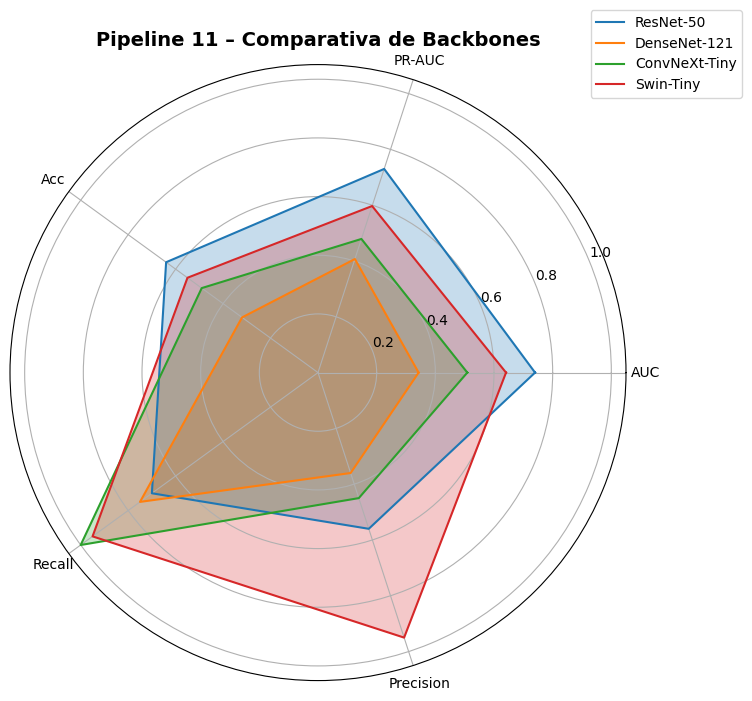

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos: mejores variantes de cada backbone
data = [
    {"Backbone": "ResNet-50",      "AUC": 0.740, "PR-AUC": 0.730, "Acc": 0.64, "Recall": 0.70, "Precision": 0.56},
    {"Backbone": "DenseNet-121",   "AUC": 0.343, "PR-AUC": 0.407, "Acc": 0.32, "Recall": 0.75, "Precision": 0.36},
    {"Backbone": "ConvNeXt-Tiny",  "AUC": 0.509, "PR-AUC": 0.479, "Acc": 0.49, "Recall": 1.00, "Precision": 0.45},
    {"Backbone": "Swin-Tiny",      "AUC": 0.641, "PR-AUC": 0.597, "Acc": 0.55, "Recall": 0.95, "Precision": 0.95},
]

df = pd.DataFrame(data)

# Plot radar chart comparando las métricas
import numpy as np

metrics = ["AUC", "PR-AUC", "Acc", "Recall", "Precision"]
N = len(metrics)

angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

for i, row in df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row["Backbone"])
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax.set_ylim(0,1.05)
ax.set_title("Pipeline 11 – Comparativa de Backbones", fontsize=14, weight="bold")
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()


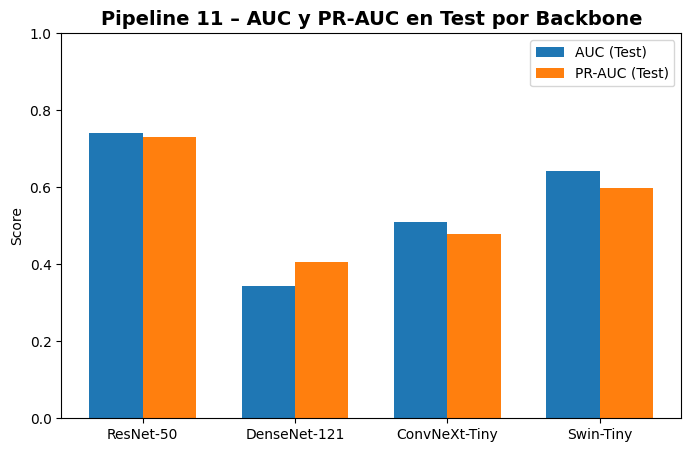

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos de mejores variantes en TEST
data = [
    {"Backbone": "ResNet-50",     "AUC": 0.740, "PR-AUC": 0.730},
    {"Backbone": "DenseNet-121",  "AUC": 0.343, "PR-AUC": 0.407},
    {"Backbone": "ConvNeXt-Tiny", "AUC": 0.509, "PR-AUC": 0.479},
    {"Backbone": "Swin-Tiny",     "AUC": 0.641, "PR-AUC": 0.597},
]

df = pd.DataFrame(data)

# Plot
x = range(len(df))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar([p - width/2 for p in x], df["AUC"], width, label="AUC (Test)")
ax.bar([p + width/2 for p in x], df["PR-AUC"], width, label="PR-AUC (Test)")

ax.set_xticks(x)
ax.set_xticklabels(df["Backbone"])
ax.set_ylim(0, 1.0)
ax.set_ylabel("Score")
ax.set_title("Pipeline 11 – AUC y PR-AUC en Test por Backbone", fontsize=14, weight="bold")
ax.legend()
plt.show()
